In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv("../data/data.csv")
data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [39]:
(data[data.CalculatedPremiumPerTerm > 0]).shape

(1000091, 52)

In [40]:
# Calculate the number of missing values per feature
missing_features = data.isnull().sum()[data.isnull().sum() > 0]
print(missing_features)
# Calculate the percentage of missing values per feature
missing_percentage = (missing_features / len(data)) * 100

# Create a DataFrame summarizing missing data
missing_df = pd.DataFrame({
    'missing_count': missing_features,
    'missing_percentage': missing_percentage
})

# Optional: Display the DataFrame sorted by missing percentage (descending)
missing_df = missing_df.sort_values(by='missing_percentage', ascending=False)

print(missing_df)

Citizenship                 895210
Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64
                         missing_count  missing_percentage
NumberOfVehiclesInFleet        1000098          100.000000
CrossBorder                     999400           99.930207
Citiz

In [41]:
categorical_features = data.select_dtypes(include="object").columns.to_list()
numerical_features = data.select_dtypes(include="number").columns.to_list()
boolean_features = data.select_dtypes(include="bool").columns.to_list()

print(f"Identified {len(categorical_features)} categorical features: {categorical_features}")
print(f"Identified {len(numerical_features)} numerical features: {numerical_features}")
print(f"Identified {len(boolean_features)} numerical features: {boolean_features}")

Identified 34 categorical features: ['TransactionMonth', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make', 'Model', 'bodytype', 'VehicleIntroDate', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType']
Identified 15 numerical features: ['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode', 'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CustomValueEstimate', 'NumberOfVehiclesInFleet', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']
Identified 3 numerical features: ['IsVATRegistered', 'AlarmImmobiliser', 'TrackingDevice']


In [42]:
# Identify features with more than 30% missing values and drop them
highly_missed_features = missing_df[missing_df['missing_percentage'] > 30].index.to_list()
data = data.drop(columns=highly_missed_features)

print("Dropped features with >30% missing values:", highly_missed_features)

Dropped features with >30% missing values: ['NumberOfVehiclesInFleet', 'CrossBorder', 'Citizenship', 'CustomValueEstimate', 'WrittenOff', 'Converted', 'Rebuilt']


In [43]:
filling_need_cat_features = [col for col in missing_features.index if col in data.select_dtypes(include="object").columns]
filling_need_num_features = [col for col in missing_features.index if col in data.select_dtypes(include="number").columns]
filling_need_bool_features = [col for col in missing_features.index if col in data.select_dtypes(include="bool").columns]


# Fill missing values in numerical features with the mean
for col in filling_need_num_features:
    data[col] = data[col].fillna(data[col].mean())

# Fill missing values in categorical features with the mode
for col in filling_need_cat_features:
    mode_val = data[col].mode()[0]
    data[col] = data[col].fillna(mode_val)

In [44]:

# Convert columns to datetime
data["VehicleIntroDate"] = pd.to_datetime(data["VehicleIntroDate"])
data["TransactionMonth"] = pd.to_datetime(data["TransactionMonth"])

# Calculate duration in months between TransactionMonth and VehicleIntroDate
data["duration"] = (data["TransactionMonth"].dt.year - data["VehicleIntroDate"].dt.year) * 12 + \
                   (data["TransactionMonth"].dt.month - data["VehicleIntroDate"].dt.month)

data["Year"] = data["TransactionMonth"]

In [45]:
data = data.drop(columns=['TotalClaims'])

When building a machine learning model to predict an appropriate premium (e.g., `CalculatedPremiumPerTerm`), it's crucial to avoid **leaky features**—features that either directly or indirectly contain information about the target variable (`CalculatedPremiumPerTerm`) or are influenced by it. Leaky features can lead to overly optimistic model performance during training but fail in real-world deployment.

### **Potential Leaky Features to Avoid:**
1. **`TotalPremium`**  
   - This is likely derived from `CalculatedPremiumPerTerm` (e.g., `TotalPremium = CalculatedPremiumPerTerm × TermFrequency`).  
   - **Why it’s leaky?** It directly depends on the target variable.

2. **`PremiumPerTerm` (if it exists)**  
   - If this is a direct duplicate or near-duplicate of `CalculatedPremiumPerTerm`, it’s a leak.

3. **`SumInsured` (if used improperly)**  
   - If `CalculatedPremiumPerTerm` is derived as a percentage of `SumInsured`, then using `SumInsured` naively could introduce a circular dependency.  
   - **Solution:** Instead of using `SumInsured` directly, consider risk factors that justify the sum insured (e.g., `CustomValueEstimate`, `VehicleType`, etc.).

4. **`StatutoryClass` or `StatutoryRiskType` (if derived from premium)**  
   - If these are regulatory classifications that are determined based on premium calculations, they may leak information.  
   - **Check:** Verify whether these are independent risk categories or derived from pricing.

5. **`ExcessSelected` (if influenced by premium)**  
   - If clients choose higher excess (deductible) to reduce premiums, this could create a feedback loop.  
   - **Solution:** Treat as a client choice rather than a risk factor unless proven independent.


6. **`TotalClaims` (if future claims influence past premiums)**  
   - If `CalculatedPremiumPerTerm` is adjusted based on past claims, this could leak future information.  
   - **Solution:** Only use historical claims data if temporally validated.


### Dropping leakage Features

In [46]:
leakage_features = [
    "TotalPremium", 'PremiumPerTerm', 'ExcessSelected', 'StatutoryClass', 'StatutoryRiskType', 'TotalClaims'
]

for col in leakage_features:
    if col in data.columns:
        data = data.drop(columns=col)
        
data.shape

(1000098, 42)

In [47]:
import warnings

warnings.filterwarnings('ignore')
for col in data.select_dtypes(include="object").columns:
    if data[col].nunique() == 1:
        data.drop(columns=[col], inplace=True)
        
data.shape

(1000098, 39)

In [48]:
import warnings

warnings.filterwarnings('ignore')
for col in data.select_dtypes(include="bool").columns:
    if data[col].nunique() == 1:
        data.drop(columns=[col], inplace=True)
        
data.shape

(1000098, 36)

In [54]:
data.CapitalOutstanding.iloc[10:10000:900]

10      119300
910          0
1810         0
2710    135800
3610    200000
4510    230000
5410    274400
6310         0
7210    270600
8110    282100
9010    200000
9910    149500
Name: CapitalOutstanding, dtype: object

In [55]:
# Remove dots (thousands separators) and replace commas (decimal separators) with dots
data["CapitalOutstanding"] = (
    data["CapitalOutstanding"]
    .astype(str)  # Ensure all values are strings
    .str.replace(',', '', regex=False) # Replace decimal comma with dot
    .astype(float)  # Convert to float
)

In [56]:
data.CapitalOutstanding.head()

0    119300.0
1    119300.0
2    119300.0
3    119300.0
4    119300.0
Name: CapitalOutstanding, dtype: float64

In [57]:
import re

# Function to standardize class names: lowercase, remove special characters, replace spaces with underscores
def clean_class_name(x):
    if isinstance(x, str):
        x = x.lower() # Convert to lowercase
        
        x = re.sub(r'[^\w\s]', '', x)  # Remove special characters
        x = x.strip()
        x = re.sub(r'\s+', '_', x)     # Replace spaces with underscores
        return x
    return x

# Apply to all categorical features

categorical_features = data.select_dtypes("object").columns.to_list()
for col in categorical_features:
    data[col] = data[col].apply(clean_class_name)

In [58]:
for col in categorical_features:
    print(col, data[col].nunique())

LegalType 6
Title 5
Bank 11
AccountType 3
MaritalStatus 3
Gender 3
Province 9
MainCrestaZone 16
SubCrestaZone 45
VehicleType 5
make 42
Model 406
bodytype 13
NewVehicle 2
TermFrequency 2
CoverCategory 26
CoverType 22
CoverGroup 14
Section 5
Product 4


In [59]:
# Map Title to Gender for consistency where Gender is missing or 'Not specified'
title_gender_map = {
    'mr': 'male',
    'mrs': 'female',
    'ms': 'female',
    'miss': 'female',
    'dr': "not_specified"
}

# Update Gender based on Title where Gender is missing or 'Not specified'
mask = (data['Gender'] == 'not_specified')
data.loc[mask, 'Gender'] = data.loc[mask, 'Title'].map(title_gender_map).fillna(data.loc[mask, 'Gender'])

In [60]:
# Iterate over each categorical feature
for col in categorical_features:
    # Get value counts for the column
    value_counts = data[col].value_counts()
    # Identify classes with fewer than 100 occurrences
    rare_classes = value_counts[value_counts < 1000].index
    # Replace rare classes with 'Other'
    data[col] = data[col].apply(lambda x: 'other' if x in rare_classes else x)

In [61]:
def encode_categorical_features_by_claims(df, categorical_features, target_col="CapitalOutstanding"):
    """
    Encodes categorical features in a DataFrame:
    - If a feature has more than 5 unique classes, uses target-based label encoding (mean TotalClaims).
    - If a feature has 5 or fewer unique classes, uses one-hot encoding.
    Returns a new DataFrame with encoded features.
    """
    df_encoded = df.copy()
    for col in categorical_features:
        n_unique = df_encoded[col].nunique()
        if n_unique > 20:
            # Target-based label encoding: map each category to mean TotalClaims
            means = df_encoded.groupby(col)[target_col].mean()
            df_encoded[col] = df_encoded[col].map(means)
        else:
            # One-hot encoding for features with 5 or fewer classes
            dummies = pd.get_dummies(df_encoded[col], prefix=col)
            df_encoded = pd.concat([df_encoded.drop(columns=[col]), dummies], axis=1)
            
    return df_encoded

df_encoded = encode_categorical_features_by_claims(df=data, categorical_features=categorical_features)

df_encoded.shape

(1000098, 155)

In [64]:
training_features = [col for col in df_encoded.select_dtypes(include=["bool", "number"]).columns]

print(len(training_features))

152


In [67]:
# Select all boolean and numerical columns as training features
training_features = [col for col in df_encoded.select_dtypes(include=["bool", "number"]).columns]

print(f"Number of training features: {len(training_features)}")

Number of training features: 152


In [72]:
# Drop all datetime columns from the DataFrame
datetime_cols = df_encoded.select_dtypes(include=["datetime", "datetime64[ns]"]).columns
df_encoded = df_encoded.drop(columns=datetime_cols)

df_encoded.shape

(1000098, 152)

In [73]:
X, y = df_encoded.drop(columns=["CalculatedPremiumPerTerm"]), df_encoded["CalculatedPremiumPerTerm"]

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(800078, 151) (200020, 151)


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Predict the mean of y_train for all test samples (baseline model)
y_pred = np.full(len(y_test), y_train.mean())

r2 = r2_score(y_test, y_pred)

print(f"Baseline R-squared: {r2:.4f}")

Baseline R-squared: -0.0000


In [76]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets


print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Dictionary to store model scores: model_name -> [RMSE, R2]
scores = {}

# List of regression models to evaluate
models = [
    LinearRegression(), 
    GradientBoostingRegressor(),
    RandomForestRegressor(), 
    XGBRegressor()
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    scores[model.__class__.__name__] = [rmse, r2]

print("Model Evaluation Scores (RMSE, R2):")
for model_name, score in scores.items():
    print(f"{model_name}: RMSE={score[0]:.4f}, R2={score[1]:.4f}")

Training set shape: (800078, 151)
Testing set shape: (200020, 151)
Model Evaluation Scores (RMSE, R2):
LinearRegression: RMSE=42954.3144, R2=0.4619
GradientBoostingRegressor: RMSE=2294.5841, R2=0.9713
RandomForestRegressor: RMSE=17.9629, R2=0.9998
XGBRegressor: RMSE=628.6788, R2=0.9921


### Best Model

In [78]:
best_model = RandomForestRegressor()

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [80]:
print("R2 =", r2)
print("RMSE =", rmse)

R2 = 0.9997625931964588
RMSE = 18.95190747432761


SumInsured                                      0.742954
CoverType_own_damage                            0.203703
CoverType_third_party                           0.013253
CoverCategory_third_party                       0.011005
CoverGroup_comprehensive_taxi                   0.006131
Province_kwazulunatal                           0.004597
cubiccapacity                                   0.003117
UnderwrittenCoverID                             0.003056
PolicyID                                        0.001868
RegistrationYear                                0.001791
PostalCode                                      0.001190
Product_mobility_metered_taxis_monthly          0.001070
Product_mobility_commercial_cover_monthly       0.000864
Province_north_west                             0.000745
CapitalOutstanding                              0.000490
Province_gauteng                                0.000471
duration                                        0.000266
Model                          

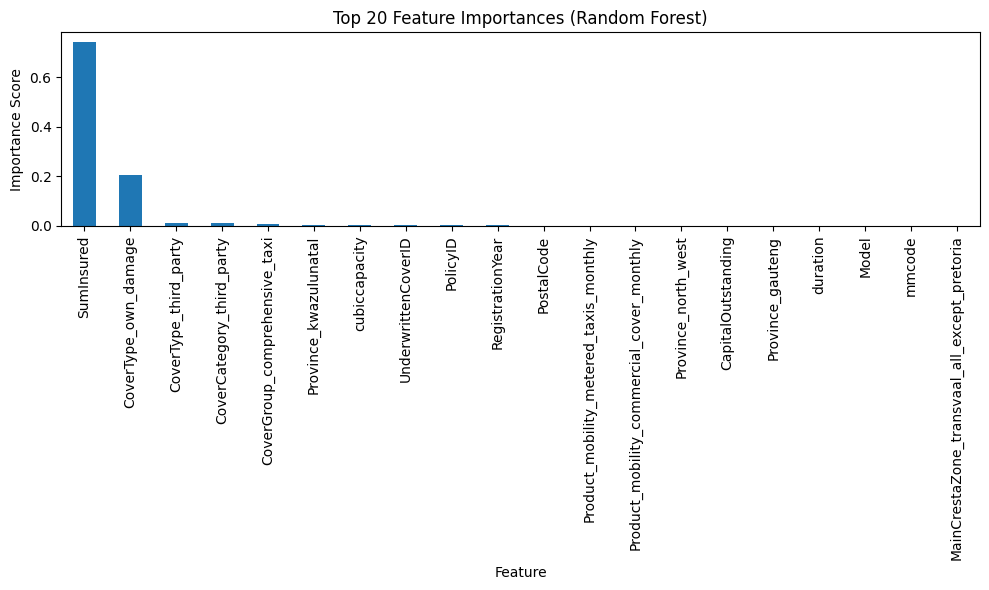

In [81]:
# Assuming you have a trained RandomForestRegressor model called 'best_model'
# and your feature names are in X_train.columns

importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

# Display top 20 features
print(importances.head(20))

# Plot feature importances
plt.figure(figsize=(10, 6))
importances.head(20).plot(kind='bar')
plt.title("Top 20 Feature Importances (Random Forest)")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()

In [82]:
import joblib

# Save the trained model to a file
joblib.dump(best_model, "../models/random_forest_premium_model.pkl")



['../models/random_forest_premium_model.pkl']

# Report: Machine Learning Pipeline for Premium Prediction (`tas-4-part.ipynb`)

## Overview

This notebook documents the full workflow for preparing insurance data and building a machine learning model to predict insurance premiums (`CalculatedPremiumPerTerm`). The process includes data cleaning, feature engineering, encoding, leakage prevention, model training, evaluation, and model saving.

---

## What I Did and How

### 1. **Data Loading and Exploration**
- Loaded the cleaned insurance dataset from CSV.
- Inspected the data structure and checked for records with positive premium values.

### 2. **Missing Value Analysis and Handling**
- Calculated missing value counts and percentages for each feature.
- Summarized missing data and dropped features with more than 30% missing values.

### 3. **Feature Categorization**
- Identified categorical, numerical, and boolean features using pandas' `select_dtypes`.

### 4. **Imputation of Missing Values**
- Filled missing values in numerical features with the mean.
- Filled missing values in categorical features with the mode.

### 5. **Datetime Feature Engineering**
- Converted `VehicleIntroDate` and `TransactionMonth` to datetime.
- Created a `duration` feature (months between vehicle introduction and transaction).
- Extracted the year from `TransactionMonth`.

### 6. **Leakage Prevention**
- Identified and dropped leaky features (e.g., `TotalPremium`, `PremiumPerTerm`, `ExcessSelected`, `StatutoryClass`, `StatutoryRiskType`, `TotalClaims`) to avoid data leakage.

### 7. **Constant Feature Removal**
- Dropped categorical and boolean features with only one unique value.

### 8. **Data Cleaning and Standardization**
- Cleaned the `CapitalOutstanding` column and converted it to float.
- Standardized categorical feature values (lowercase, removed special characters, replaced spaces with underscores).

### 9. **Rare Category Handling**
- Replaced rare categories (fewer than 1,000 occurrences) in categorical features with `'other'`.

### 10. **Imputing Gender from Title**
- Used the `Title` column to infer and fill missing or unspecified values in the `Gender` column.

### 11. **Categorical Feature Encoding**
- Encoded categorical features:
  - Used target-based encoding for features with more than 20 unique classes.
  - Used one-hot encoding for features with 20 or fewer classes.

### 12. **Feature Selection and Final Preparation**
- Selected all boolean and numerical columns as training features.
- Dropped all datetime columns from the encoded DataFrame.

### 13. **Train-Test Split**
- Split the data into training and testing sets (80/20 split).

### 14. **Baseline Model**
- Established a baseline by predicting the mean of the training target for all test samples and calculated the baseline R² score.

### 15. **Model Training and Evaluation**
- Trained and evaluated four regression models:
  - Linear Regression
  - Gradient Boosting Regressor
  - Random Forest Regressor
  - XGBoost Regressor
- Calculated RMSE and R² for each model and selected the best-performing model (Random Forest Regressor).

### 16. **Feature Importance**
- Extracted and visualized the top 20 feature importances from the Random Forest model.

### 17. **Model Saving**
- Saved the trained Random Forest model to disk using `joblib` for future use.

---

## Summary

This notebook demonstrates a complete, systematic approach to insurance premium prediction, including robust data cleaning, thoughtful feature engineering, careful encoding, and rigorous model evaluation and selection. The final model is saved for deployment or further analysis.